In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
import requests
mpl.style.use('ggplot')
%matplotlib inline

__Dataset__

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/mcd14dl-nrt).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

In [3]:
#get the url containing the csv file
base_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
response = requests.get(base_url)

#if request is successful create the dataframe
if response.status_code == 200:
    print("Request sucessfull!")
    df = pd.read_csv(base_url)
    print("Data Frame created.")
else:
    print("Something's wrong.")

Request sucessfull!
Data Frame created.


In [4]:
#first look at the dataframe
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
#dimensions of the dataframe
df.shape

(26406, 10)

In [6]:
#verify columns of the dataframe
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [7]:
#verify data types of dataframe
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns

In [8]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [9]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

__Exercise 1.1__: Try to understand the change in average estimated fire area over time (using pandas to plot)

In [10]:
#group by year and take the mean of the estimated_fire_area per year
x = df.groupby('Year')['Estimated_fire_area'].mean()

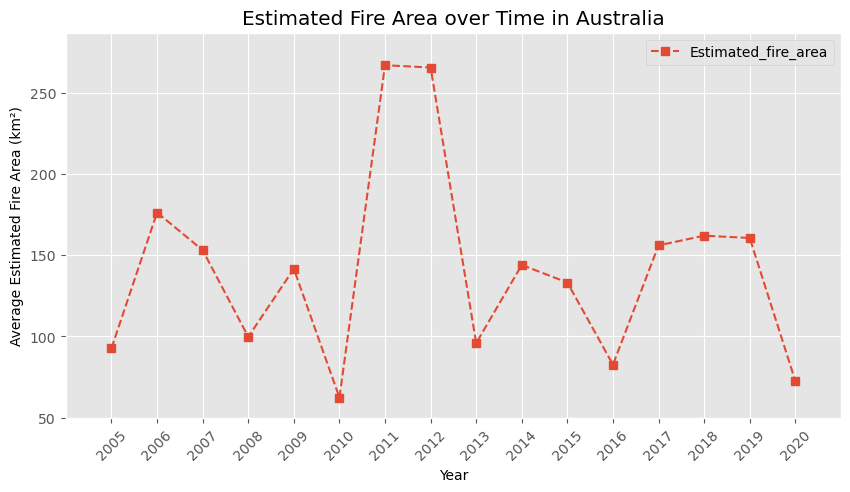

In [11]:
#plot the data
x.plot(kind= 'line',
       figsize = (10,5), #determine figsize
       xticks = list(x.index), #set xticks
       xlim = (x.index.min()-1, x.index.max()+1), #set limits of xticks
       ylim = (50, x.max()+20), #set limits of y ticks
       legend = True, #show legend
       style = "--s", #using a dashed line
       rot = 45 #rotate x axis labels
      )

plt.ylabel("Average Estimated Fire Area (km²)") #set title of y axis
plt.xlabel("Year") #set title of x axis
plt.title("Estimated Fire Area over Time in Australia")

#show the plot
plt.show()

__Exercise 1.2__: plotting the estimated fire area for year grouped together with month.

In [12]:
#groupby year and month and find the mean
x1 = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()

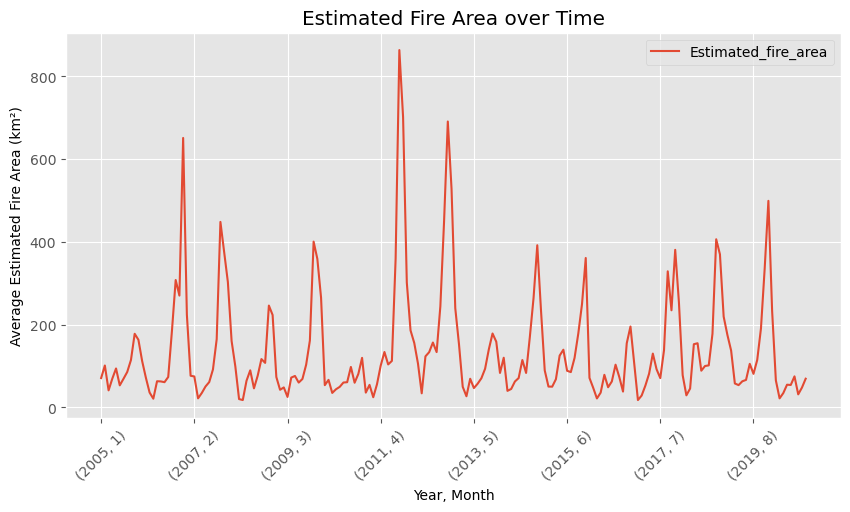

In [13]:
#plot the data
x1.plot(x=x1.index, y=x1.values,
        figsize=(10,5), #set the figure size
        legend=True, #add legend to the figure
        rot = 45 #rotate xticks
       )
             
plt.xlabel('Year, Month')#set title of x axis
plt.ylabel('Average Estimated Fire Area (km²)') #set title of y axis
plt.title('Estimated Fire Area over Time') #set a plot title

#show the plot
plt.show()

__Exercise 1.3__: distribution of mean estimated fire brightness across the regions
using the functionality of seaborn to develop a barplot.

In [14]:
#let's see the unique regions
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [15]:
#group by region and round the mean estimated fire brightness
df_region = df.groupby('Region')["Mean_estimated_fire_brightness"].mean().round(2)

#get the regions
regions = list(df_region)

In [16]:
#let's see the result by sorting the values
df_region.sort_values(ascending = False, inplace = True)
df_region

Region
WA     324.14
NT     322.90
SA     321.50
QL     318.36
NSW    315.53
VI     315.03
TA     313.37
Name: Mean_estimated_fire_brightness, dtype: float64

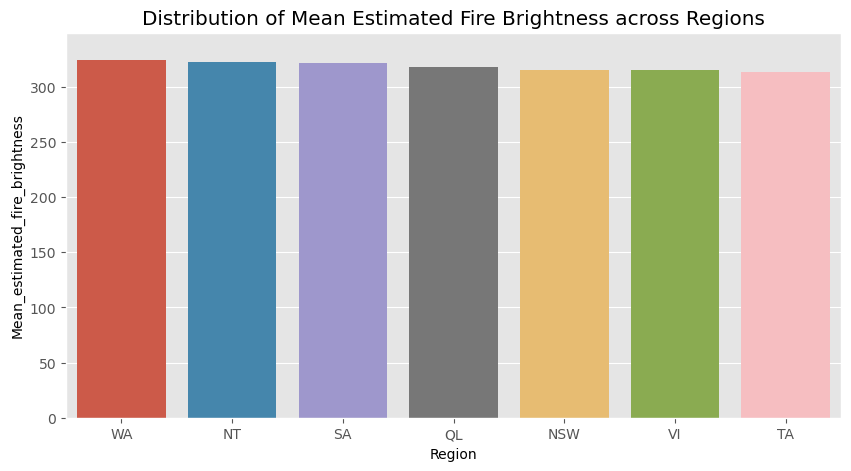

In [17]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_region.index, y = df_region.values)

plt.ylabel("Mean_estimated_fire_brightness")
plt.ylim(0,df_region.max()+25)
plt.title("Distribution of Mean Estimated Fire Brightness across Regions")
plt.show()

__Exercise 1.4__: Using a pie chart to find the portion of count of pixels for presumed vegetation fires vary across regions.

In [18]:
#let's look again at the dataframe columns
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

Column __count__ refers the to daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region.

In [19]:
#get the sum of counts per region
df_region_counts = df.groupby('Region')['Count'].sum()

In [20]:
#see the result
df_region_counts

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

In [21]:
#sort the result
df_region_counts.sort_values(ascending = False, inplace = True)
df_region_counts

Region
NT     649430
WA     615968
QL     420882
NSW    117412
VI      52473
SA      35160
TA      11473
Name: Count, dtype: int64

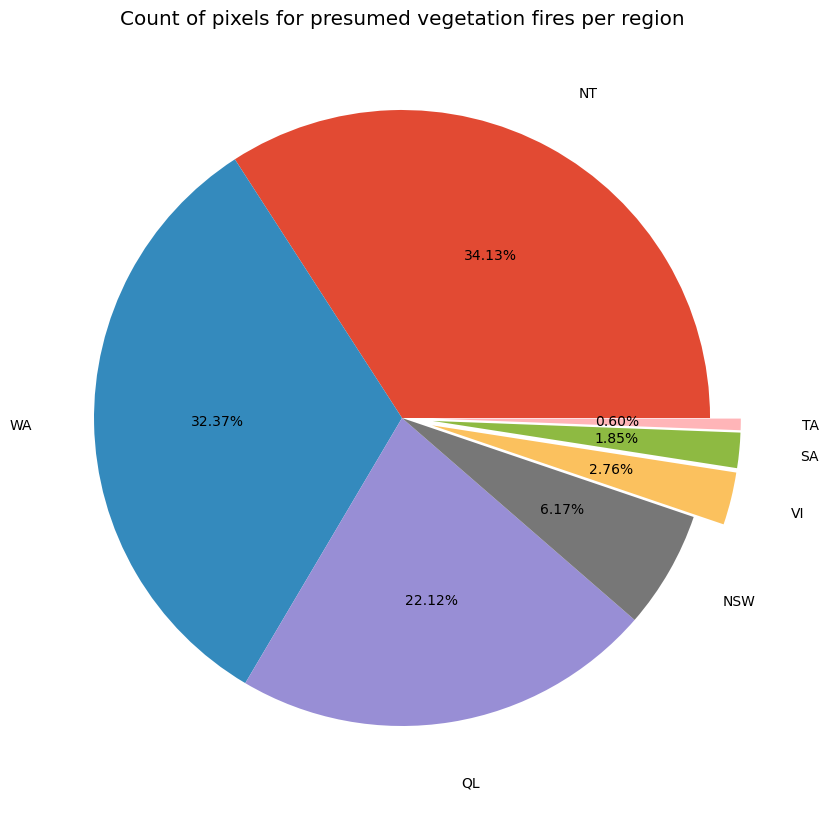

In [22]:
#create a figure
plt.figure(figsize = (10,10)) 
plt.pie(x = df_region_counts,
        labels = df_region_counts.index,
        autopct = "%1.2f%%", #show the percentages of each portion
       labeldistance=1.2, #distance the labels from the chart
       explode = [0,0,0,0,0.1,0.1,0.1] #push out the regions with percentages less than 5%
       ) 

#add a title
plt.title("Count of pixels for presumed vegetation fires per region")

#show the figure
plt.show()

__Exercise 1.5__: I will remove the autopct parameter from plt.pie and add the percentages in the legend.

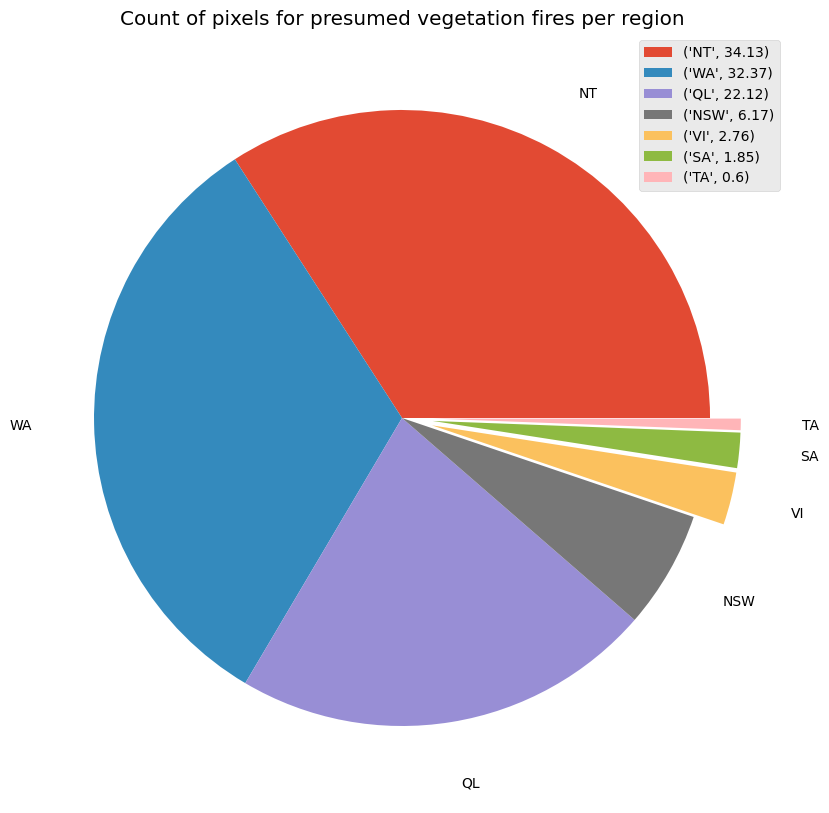

In [23]:
plt.figure(figsize = (10,10)) #create a figure

plt.pie(x = df_region_counts,
        labels = df_region_counts.index,
       labeldistance=1.2, #distance the labels from the chart
       explode = [0,0,0,0,0.1,0.1,0.1] #push out the regions with percentages less than 5%
       ) 

#add a legend which will show the abbreviated regions as well as the relevant percentages of the count they occupy.
plt.legend([(i,round(k/df_region_counts.sum()*100,2)) for i,k in zip(df_region_counts.index, df_region_counts)])

#add a title
plt.title("Count of pixels for presumed vegetation fires per region")

#show the figure
plt.show()

__Exercise 1.6__: Let's try to develop a histogram of the mean estimated fire brightness
Using Matplotlib to create the histogram

In [24]:
#extract the relevant information in a new variable
df_brightness = df["Mean_estimated_fire_brightness"]

In [25]:
bins_ = np.linspace(round(df_brightness.min()), round(df_brightness.max()), 50)

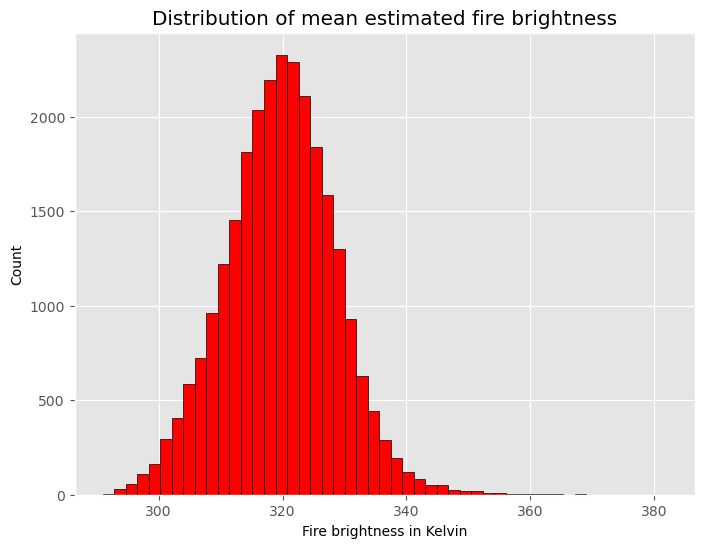

In [26]:
#using Matplotlib to create the figure and axes
#create bins for our histogram
fig, ax = plt.subplots(figsize = (8,6))

#plot the ax
ax.hist(df_brightness, bins = bins_, color = 'red', edgecolor = 'black')

ax.set_ylabel("Count") #set y label
ax.set_xlabel("Fire brightness in Kelvin") #set x label
ax.set_title("Distribution of mean estimated fire brightness") #set title

#show the figure
plt.show()

__Exercise__ 1.7.1: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue.

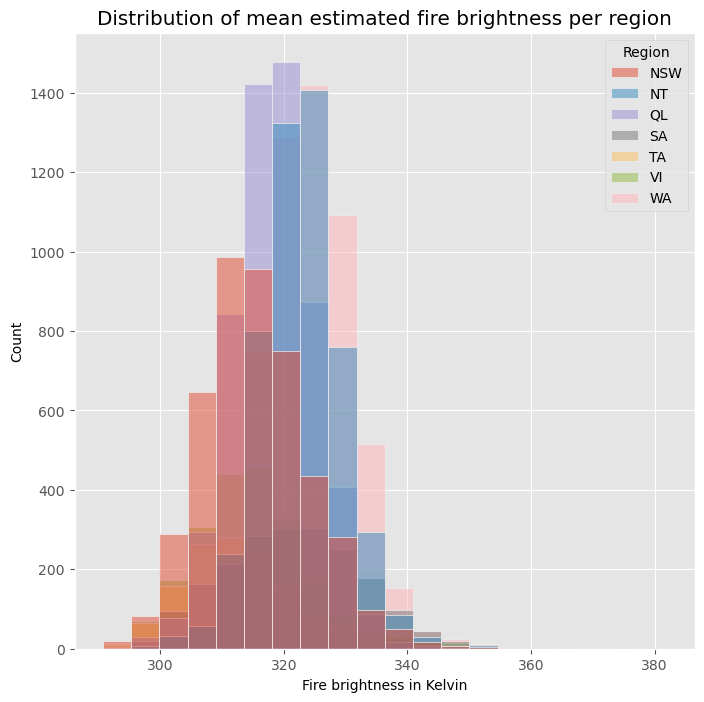

In [27]:
#set the figure
plt.figure(figsize = (8,8))

#plot
sns.histplot(data = df,x = "Mean_estimated_fire_brightness", hue = 'Region', bins = 20)

plt.ylabel("Count")
plt.xlabel("Fire brightness in Kelvin")
plt.title("Distribution of mean estimated fire brightness per region")

plt.show()

__Exercise 1.7.2__: Similar to exercise 1.7.1 however we will also add the parameter multiple = 'stack' to see the difference in the plot.

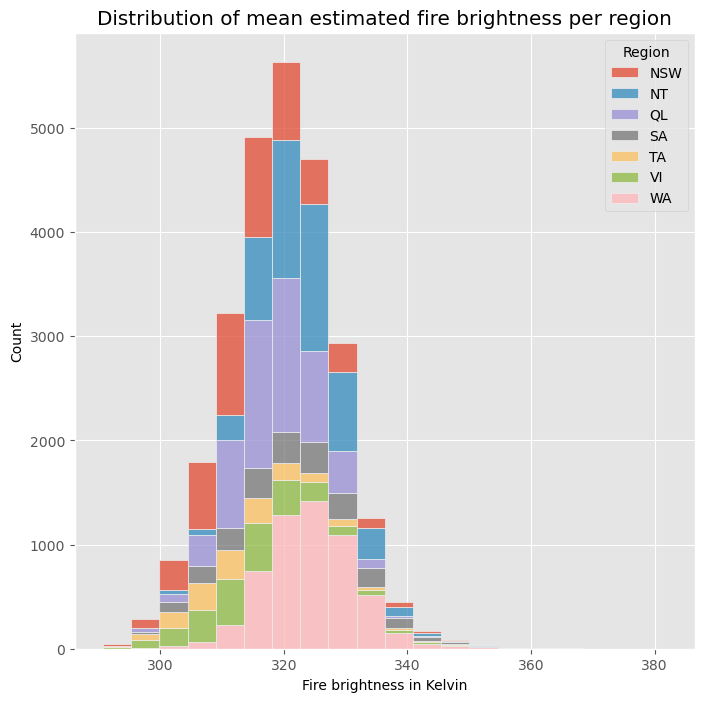

In [28]:
#set the figure
plt.figure(figsize = (8,8))

#plot
sns.histplot(data = df,x = "Mean_estimated_fire_brightness", hue = 'Region', bins = 20, multiple = 'stack')

plt.ylabel("Count") #add a label to y axis
plt.xlabel("Fire brightness in Kelvin") #add a label to x axis
plt.title("Distribution of mean estimated fire brightness per region") #set a title for the plot

#show the figure
plt.show()

__Exercise__ 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

In [29]:
#let's first see the correlation using the .corr() method
df[["Mean_estimated_fire_radiative_power", "Mean_confidence"]].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


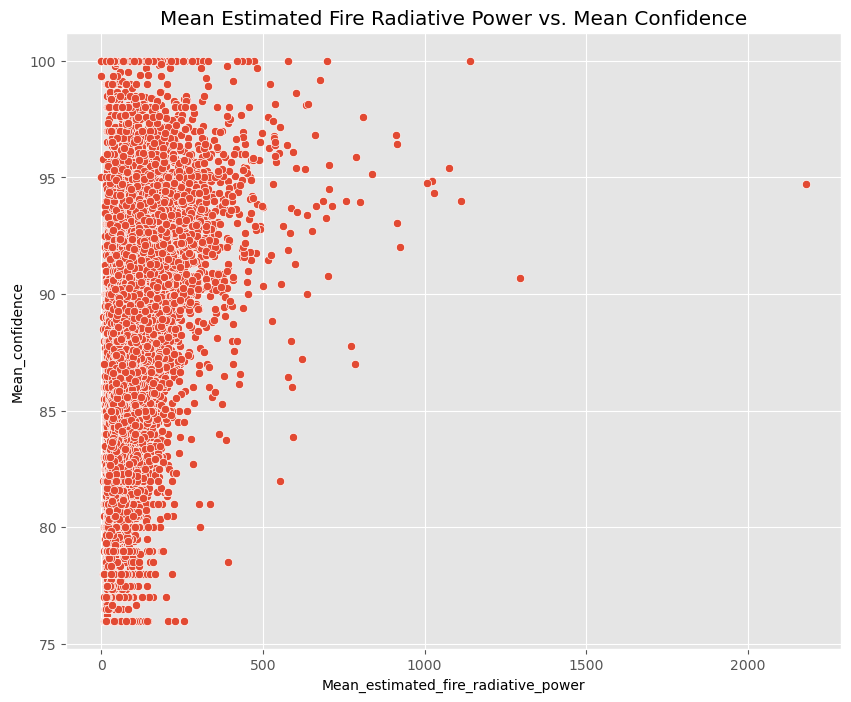

In [30]:
#let's plot the two variables and see the points and if there is a pattern

#set the figure
plt.figure(figsize = (10,8))

sns.scatterplot(data = df, x = "Mean_estimated_fire_radiative_power", y = "Mean_confidence")

#set a title for the plot
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')

#show the figure
plt.show()

__Exercise__ 1.9: Let's mark these seven regions on the Map of Australia using Folium.

The exercise notebook already provides a dataframe which contains the regions, their latitudes and longitudes.

For Australia use [-25, 135] as location to create the map.

In [31]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [41]:
#create first a map of Australia

map_AU = folium.Map(location = [-26,133], zoom_start = 4)
map_AU

In [57]:
#add a marker for each of the 7 regions with a for loop
for i in range(len(region_data['region'])):
    folium.Marker(location = [region_data['Lat'][i], region_data['Lon'][i]], 
                              tooltip = 'Marker', popup=region_data['region'][i]).add_to(map_AU)

In [58]:
#see the updated map
map_AU